In [31]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import optimizers
from sklearn.model_selection import train_test_split

In [32]:
features_num = 3
num = 220

In [33]:
Train_dataset = np.loadtxt('trainset(2)/J0003_0024_0222_20110307012737_cell_7.csv',delimiter=",", skiprows=1)
Test_dataset = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_03.csv',delimiter=",", skiprows=1)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Train_dataset = scaler.fit_transform(Train_dataset)
Test_dataset = scaler.fit_transform(Test_dataset)
print(Train_dataset)

X_train = Train_dataset[:, 0:features_num]
Y_train = Train_dataset[:, 0:features_num]



[[0.         0.         0.        ]
 [0.00291545 0.         0.        ]
 [0.0058309  0.         0.        ]
 [0.0058309  0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.00291545 0.         0.        ]
 [0.00291545 0.         0.        ]
 [0.0058309  0.         0.        ]
 [0.0058309  0.         0.        ]
 [0.00874636 0.         0.        ]
 [0.0058309  0.         0.        ]
 [0.0058309  0.         0.        ]
 [0.00874636 0.         0.        ]
 [0.01166181 0.         0.        ]
 [0.00874636 0.         0.        ]
 [0.01166181 0.         0.        ]
 [0.01166181 0.         0.        ]
 [0.01166181 0.         0.        ]
 [0.01166181 0.         0.        ]
 [0.01166181 0.         0.        ]
 [0.01457726 0.         0.        ]
 [0.01749271 0.         0.        ]
 [0.02332362 0.         0.        ]
 [0.02332362 0.         0.        ]
 [0.02332362 0.         0.        ]
 [0.02623907 0.         0.        ]
 [0.02040816 0.         0.  

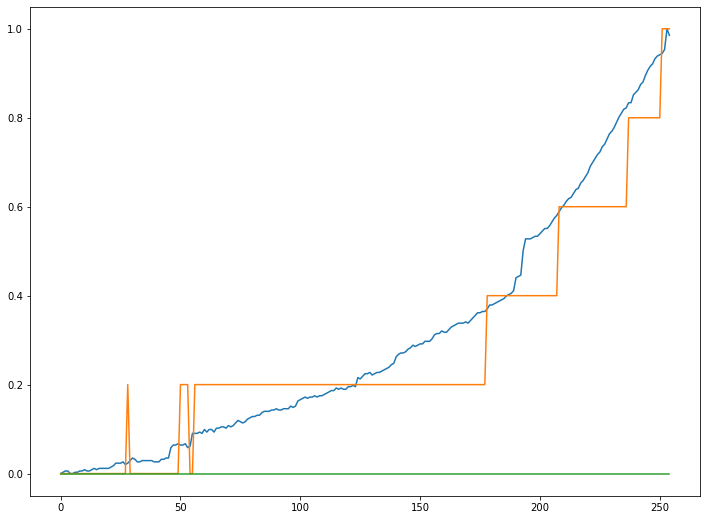

In [34]:
X_test = Train_dataset[num:250, 0:features_num]
Y_test = Train_dataset[num:250, 0:features_num]
r_x_test = Test_dataset[:,0:features_num]
r_y_test = Test_dataset[:,0:features_num]
plt.figure(figsize=(12, 9))
plt.plot(Train_dataset)

In [35]:
def make_dataset(data, label, window_size=10):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data[i:i+window_size]))
        label_list.append(np.array(label[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [36]:
train_feature, train_label = make_dataset(X_train, Y_train, 10)

In [37]:
test_feature, test_label = make_dataset(r_x_test, r_y_test, 10)

test_feature.shape, test_label.shape
print(test_feature.shape, test_label.shape)

(248, 10, 3) (248, 3)


In [38]:
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)
print(x_train.shape, x_valid.shape)

(196, 10, 3) (49, 10, 3)


In [39]:
OUT_STEPS = 32
model = tf.keras.Sequential()
model.add(tf.keras.layers.GRU(64,
               input_shape=(train_feature.shape[1], train_feature.shape[2]),
               activation='relu',
               return_sequences=True)
          )
model.add(tf.keras.layers.LSTM(32,
                                activation='relu', 
                               return_sequences=False))
model.add(tf.keras.layers.Dense(OUT_STEPS*features_num,))
                      #    kernel_initializer=tf.initializers.zeros))
model.add(tf.keras.layers.Reshape([OUT_STEPS, features_num]))

In [40]:
model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(lr=0.001),
                metrics=[tf.metrics.MeanAbsoluteError()])
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=500, mode='min')
filename = os.path.join('models/', 'tmp_checkpointcell7_GRU_onefeature_copy7.h5')
checkpoint = tf.keras.callbacks.ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

In [51]:
history = model.fit(x_train, y_train,
                                    epochs=3000,
                                    batch_size=1,
                                    validation_data=(x_valid, y_valid),
                                    callbacks=[early_stop, checkpoint])

Epoch 1/3000
196/196 [==============================] - 1s 4ms/step - loss: 4.1054e-04 - mean_absolute_error: 0.0091 - val_loss: 0.0017 - val_mean_absolute_error: 0.0236

Epoch 00001: val_loss did not improve from 0.00049
Epoch 2/3000
196/196 [==============================] - 1s 4ms/step - loss: 5.2200e-04 - mean_absolute_error: 0.0115 - val_loss: 7.7685e-04 - val_mean_absolute_error: 0.0132

Epoch 00002: val_loss did not improve from 0.00049
Epoch 3/3000
196/196 [==============================] - 1s 4ms/step - loss: 4.4765e-04 - mean_absolute_error: 0.0102 - val_loss: 6.2725e-04 - val_mean_absolute_error: 0.0106

Epoch 00003: val_loss did not improve from 0.00049
Epoch 4/3000
196/196 [==============================] - 1s 4ms/step - loss: 3.7813e-04 - mean_absolute_error: 0.0087 - val_loss: 0.0011 - val_mean_absolute_error: 0.0186

Epoch 00004: val_loss did not improve from 0.00049
Epoch 5/3000
196/196 [==============================] - 1s 4ms/step - loss: 5.0139e-04 - mean_absolute_e

196/196 [==============================] - 1s 6ms/step - loss: 3.5381e-04 - mean_absolute_error: 0.0080 - val_loss: 6.0971e-04 - val_mean_absolute_error: 0.0099

Epoch 00037: val_loss did not improve from 0.00049
Epoch 38/3000
196/196 [==============================] - 1s 6ms/step - loss: 3.7337e-04 - mean_absolute_error: 0.0079 - val_loss: 7.0418e-04 - val_mean_absolute_error: 0.0107

Epoch 00038: val_loss did not improve from 0.00049
Epoch 39/3000
196/196 [==============================] - 1s 6ms/step - loss: 3.8006e-04 - mean_absolute_error: 0.0087 - val_loss: 9.9119e-04 - val_mean_absolute_error: 0.0140

Epoch 00039: val_loss did not improve from 0.00049
Epoch 40/3000
196/196 [==============================] - 1s 4ms/step - loss: 3.5650e-04 - mean_absolute_error: 0.0081 - val_loss: 6.3369e-04 - val_mean_absolute_error: 0.0091

Epoch 00040: val_loss did not improve from 0.00049
Epoch 41/3000
196/196 [==============================] - 1s 5ms/step - loss: 3.5428e-04 - mean_absolute_er

196/196 [==============================] - 1s 6ms/step - loss: 3.1942e-04 - mean_absolute_error: 0.0075 - val_loss: 7.2607e-04 - val_mean_absolute_error: 0.0118

Epoch 00073: val_loss did not improve from 0.00049
Epoch 74/3000
196/196 [==============================] - 1s 4ms/step - loss: 3.9001e-04 - mean_absolute_error: 0.0081 - val_loss: 6.5408e-04 - val_mean_absolute_error: 0.0100

Epoch 00074: val_loss did not improve from 0.00049
Epoch 75/3000
196/196 [==============================] - 1s 5ms/step - loss: 3.4847e-04 - mean_absolute_error: 0.0077 - val_loss: 6.7135e-04 - val_mean_absolute_error: 0.0101

Epoch 00075: val_loss did not improve from 0.00049
Epoch 76/3000
196/196 [==============================] - 1s 4ms/step - loss: 3.6587e-04 - mean_absolute_error: 0.0079 - val_loss: 5.9005e-04 - val_mean_absolute_error: 0.0094

Epoch 00076: val_loss did not improve from 0.00049
Epoch 77/3000
196/196 [==============================] - ETA: 0s - loss: 3.1126e-04 - mean_absolute_error:


Epoch 00108: val_loss did not improve from 0.00049
Epoch 109/3000
196/196 [==============================] - 1s 5ms/step - loss: 3.2672e-04 - mean_absolute_error: 0.0072 - val_loss: 5.8306e-04 - val_mean_absolute_error: 0.0078

Epoch 00109: val_loss did not improve from 0.00049
Epoch 110/3000
196/196 [==============================] - 1s 5ms/step - loss: 3.4810e-04 - mean_absolute_error: 0.0074 - val_loss: 7.4394e-04 - val_mean_absolute_error: 0.0120

Epoch 00110: val_loss did not improve from 0.00049
Epoch 111/3000
196/196 [==============================] - 1s 4ms/step - loss: 3.4837e-04 - mean_absolute_error: 0.0078 - val_loss: 7.0516e-04 - val_mean_absolute_error: 0.0099

Epoch 00111: val_loss did not improve from 0.00049
Epoch 112/3000
196/196 [==============================] - 1s 5ms/step - loss: 3.4321e-04 - mean_absolute_error: 0.0072 - val_loss: 0.0012 - val_mean_absolute_error: 0.0160

Epoch 00112: val_loss did not improve from 0.00049
Epoch 113/3000
196/196 [================


Epoch 00144: val_loss did not improve from 0.00049
Epoch 145/3000
196/196 [==============================] - 1s 4ms/step - loss: 3.4887e-04 - mean_absolute_error: 0.0076 - val_loss: 0.0011 - val_mean_absolute_error: 0.0155

Epoch 00145: val_loss did not improve from 0.00049
Epoch 146/3000
196/196 [==============================] - 1s 4ms/step - loss: 3.5221e-04 - mean_absolute_error: 0.0078 - val_loss: 6.4173e-04 - val_mean_absolute_error: 0.0091

Epoch 00146: val_loss did not improve from 0.00049
Epoch 147/3000
196/196 [==============================] - 1s 4ms/step - loss: 3.4300e-04 - mean_absolute_error: 0.0077 - val_loss: 6.6497e-04 - val_mean_absolute_error: 0.0094

Epoch 00147: val_loss did not improve from 0.00049
Epoch 148/3000
196/196 [==============================] - ETA: 0s - loss: 3.3879e-04 - mean_absolute_error: 0.007 - 1s 4ms/step - loss: 3.2544e-04 - mean_absolute_error: 0.0069 - val_loss: 6.5025e-04 - val_mean_absolute_error: 0.0086

Epoch 00148: val_loss did not imp

196/196 [==============================] - 1s 4ms/step - loss: 3.5070e-04 - mean_absolute_error: 0.0070 - val_loss: 8.1479e-04 - val_mean_absolute_error: 0.0115

Epoch 00180: val_loss did not improve from 0.00049
Epoch 181/3000
196/196 [==============================] - 1s 4ms/step - loss: 3.5582e-04 - mean_absolute_error: 0.0071 - val_loss: 8.6889e-04 - val_mean_absolute_error: 0.0121

Epoch 00181: val_loss did not improve from 0.00049
Epoch 182/3000
196/196 [==============================] - 1s 4ms/step - loss: 3.1445e-04 - mean_absolute_error: 0.0074 - val_loss: 6.6402e-04 - val_mean_absolute_error: 0.0085

Epoch 00182: val_loss did not improve from 0.00049
Epoch 183/3000
196/196 [==============================] - 1s 4ms/step - loss: 3.5763e-04 - mean_absolute_error: 0.0082 - val_loss: 6.8928e-04 - val_mean_absolute_error: 0.0085

Epoch 00183: val_loss did not improve from 0.00049
Epoch 184/3000
196/196 [==============================] - 1s 4ms/step - loss: 3.4238e-04 - mean_absolut

196/196 [==============================] - 1s 4ms/step - loss: 3.0508e-04 - mean_absolute_error: 0.0074 - val_loss: 7.6011e-04 - val_mean_absolute_error: 0.0111

Epoch 00215: val_loss did not improve from 0.00049
Epoch 216/3000
196/196 [==============================] - 1s 4ms/step - loss: 3.1329e-04 - mean_absolute_error: 0.0066 - val_loss: 6.6545e-04 - val_mean_absolute_error: 0.0081

Epoch 00216: val_loss did not improve from 0.00049
Epoch 217/3000
196/196 [==============================] - 1s 4ms/step - loss: 3.4709e-04 - mean_absolute_error: 0.0077 - val_loss: 6.0351e-04 - val_mean_absolute_error: 0.0077

Epoch 00217: val_loss did not improve from 0.00049
Epoch 218/3000
196/196 [==============================] - 1s 4ms/step - loss: 2.9891e-04 - mean_absolute_error: 0.0061 - val_loss: 6.5578e-04 - val_mean_absolute_error: 0.0094

Epoch 00218: val_loss did not improve from 0.00049
Epoch 219/3000
196/196 [==============================] - 1s 4ms/step - loss: 3.2706e-04 - mean_absolut

196/196 [==============================] - 1s 4ms/step - loss: 3.1752e-04 - mean_absolute_error: 0.0070 - val_loss: 8.2183e-04 - val_mean_absolute_error: 0.0108

Epoch 00251: val_loss did not improve from 0.00049
Epoch 252/3000
196/196 [==============================] - 1s 4ms/step - loss: 3.1622e-04 - mean_absolute_error: 0.0066 - val_loss: 6.2312e-04 - val_mean_absolute_error: 0.0078

Epoch 00252: val_loss did not improve from 0.00049
Epoch 253/3000
196/196 [==============================] - 1s 4ms/step - loss: 2.9352e-04 - mean_absolute_error: 0.0060 - val_loss: 7.5684e-04 - val_mean_absolute_error: 0.0093

Epoch 00253: val_loss did not improve from 0.00049
Epoch 254/3000
196/196 [==============================] - 1s 3ms/step - loss: 3.0995e-04 - mean_absolute_error: 0.0067 - val_loss: 6.9950e-04 - val_mean_absolute_error: 0.0082

Epoch 00254: val_loss did not improve from 0.00049
Epoch 255/3000
196/196 [==============================] - 1s 4ms/step - loss: 2.8944e-04 - mean_absolut

196/196 [==============================] - 1s 4ms/step - loss: 3.3951e-04 - mean_absolute_error: 0.0073 - val_loss: 8.0373e-04 - val_mean_absolute_error: 0.0112

Epoch 00287: val_loss did not improve from 0.00049
Epoch 288/3000
196/196 [==============================] - 1s 4ms/step - loss: 2.8754e-04 - mean_absolute_error: 0.0073 - val_loss: 6.9203e-04 - val_mean_absolute_error: 0.0086

Epoch 00288: val_loss did not improve from 0.00049
Epoch 289/3000
196/196 [==============================] - 1s 4ms/step - loss: 2.8598e-04 - mean_absolute_error: 0.0064 - val_loss: 7.8857e-04 - val_mean_absolute_error: 0.0111

Epoch 00289: val_loss did not improve from 0.00049
Epoch 290/3000
196/196 [==============================] - 1s 5ms/step - loss: 2.9516e-04 - mean_absolute_error: 0.0073 - val_loss: 6.7935e-04 - val_mean_absolute_error: 0.0082

Epoch 00290: val_loss did not improve from 0.00049
Epoch 291/3000
196/196 [==============================] - 1s 5ms/step - loss: 3.2822e-04 - mean_absolut

196/196 [==============================] - 1s 4ms/step - loss: 3.0354e-04 - mean_absolute_error: 0.0067 - val_loss: 6.7542e-04 - val_mean_absolute_error: 0.0087

Epoch 00323: val_loss did not improve from 0.00049
Epoch 324/3000
196/196 [==============================] - 1s 4ms/step - loss: 3.3706e-04 - mean_absolute_error: 0.0075 - val_loss: 6.7887e-04 - val_mean_absolute_error: 0.0084

Epoch 00324: val_loss did not improve from 0.00049
Epoch 325/3000
196/196 [==============================] - 1s 4ms/step - loss: 2.9011e-04 - mean_absolute_error: 0.0062 - val_loss: 9.8144e-04 - val_mean_absolute_error: 0.0138

Epoch 00325: val_loss did not improve from 0.00049
Epoch 326/3000
196/196 [==============================] - 1s 4ms/step - loss: 3.3351e-04 - mean_absolute_error: 0.0074 - val_loss: 8.3691e-04 - val_mean_absolute_error: 0.0123

Epoch 00326: val_loss did not improve from 0.00049
Epoch 327/3000
196/196 [==============================] - 1s 4ms/step - loss: 3.3427e-04 - mean_absolut

196/196 [==============================] - 1s 4ms/step - loss: 2.8253e-04 - mean_absolute_error: 0.0066 - val_loss: 7.0124e-04 - val_mean_absolute_error: 0.0096

Epoch 00359: val_loss did not improve from 0.00049
Epoch 360/3000
196/196 [==============================] - 1s 4ms/step - loss: 2.7941e-04 - mean_absolute_error: 0.0064 - val_loss: 8.5655e-04 - val_mean_absolute_error: 0.0118

Epoch 00360: val_loss did not improve from 0.00049
Epoch 361/3000
196/196 [==============================] - 1s 4ms/step - loss: 2.6995e-04 - mean_absolute_error: 0.0064 - val_loss: 7.3092e-04 - val_mean_absolute_error: 0.0092

Epoch 00361: val_loss did not improve from 0.00049
Epoch 362/3000
196/196 [==============================] - 1s 4ms/step - loss: 3.0959e-04 - mean_absolute_error: 0.0070 - val_loss: 6.3971e-04 - val_mean_absolute_error: 0.0080

Epoch 00362: val_loss did not improve from 0.00049
Epoch 363/3000
196/196 [==============================] - 1s 4ms/step - loss: 3.0276e-04 - mean_absolut

196/196 [==============================] - 1s 4ms/step - loss: 3.2361e-04 - mean_absolute_error: 0.0075 - val_loss: 9.2552e-04 - val_mean_absolute_error: 0.0133

Epoch 00395: val_loss did not improve from 0.00049
Epoch 396/3000
196/196 [==============================] - 1s 4ms/step - loss: 3.2538e-04 - mean_absolute_error: 0.0070 - val_loss: 7.2172e-04 - val_mean_absolute_error: 0.0093

Epoch 00396: val_loss did not improve from 0.00049
Epoch 397/3000
196/196 [==============================] - 1s 6ms/step - loss: 2.6833e-04 - mean_absolute_error: 0.0067 - val_loss: 6.9844e-04 - val_mean_absolute_error: 0.0082

Epoch 00397: val_loss did not improve from 0.00049
Epoch 398/3000
196/196 [==============================] - 1s 6ms/step - loss: 3.0593e-04 - mean_absolute_error: 0.0066 - val_loss: 7.7607e-04 - val_mean_absolute_error: 0.0096

Epoch 00398: val_loss did not improve from 0.00049
Epoch 399/3000
196/196 [==============================] - 1s 4ms/step - loss: 3.0712e-04 - mean_absolut

196/196 [==============================] - 1s 4ms/step - loss: 2.5359e-04 - mean_absolute_error: 0.0054 - val_loss: 7.2002e-04 - val_mean_absolute_error: 0.0092

Epoch 00431: val_loss did not improve from 0.00049
Epoch 432/3000
196/196 [==============================] - 1s 4ms/step - loss: 2.9249e-04 - mean_absolute_error: 0.0069 - val_loss: 6.9937e-04 - val_mean_absolute_error: 0.0086

Epoch 00432: val_loss did not improve from 0.00049
Epoch 433/3000
196/196 [==============================] - 1s 5ms/step - loss: 2.6778e-04 - mean_absolute_error: 0.0060 - val_loss: 7.9328e-04 - val_mean_absolute_error: 0.0109

Epoch 00433: val_loss did not improve from 0.00049
Epoch 434/3000
196/196 [==============================] - 1s 4ms/step - loss: 2.6650e-04 - mean_absolute_error: 0.0069 - val_loss: 6.8355e-04 - val_mean_absolute_error: 0.0084

Epoch 00434: val_loss did not improve from 0.00049
Epoch 435/3000
196/196 [==============================] - 1s 4ms/step - loss: 2.9211e-04 - mean_absolut

196/196 [==============================] - 1s 4ms/step - loss: 3.3515e-04 - mean_absolute_error: 0.0081 - val_loss: 7.2064e-04 - val_mean_absolute_error: 0.0096

Epoch 00467: val_loss did not improve from 0.00049
Epoch 468/3000
196/196 [==============================] - 1s 4ms/step - loss: 2.6171e-04 - mean_absolute_error: 0.0060 - val_loss: 6.9298e-04 - val_mean_absolute_error: 0.0082

Epoch 00468: val_loss did not improve from 0.00049
Epoch 469/3000
196/196 [==============================] - 1s 4ms/step - loss: 2.4039e-04 - mean_absolute_error: 0.0055 - val_loss: 7.7753e-04 - val_mean_absolute_error: 0.0106

Epoch 00469: val_loss did not improve from 0.00049
Epoch 470/3000
196/196 [==============================] - 1s 4ms/step - loss: 2.7040e-04 - mean_absolute_error: 0.0064 - val_loss: 0.0012 - val_mean_absolute_error: 0.0147

Epoch 00470: val_loss did not improve from 0.00049
Epoch 471/3000
196/196 [==============================] - 1s 4ms/step - loss: 2.7393e-04 - mean_absolute_er

196/196 [==============================] - ETA: 0s - loss: 2.7477e-04 - mean_absolute_error: 0.006 - 1s 4ms/step - loss: 2.6773e-04 - mean_absolute_error: 0.0064 - val_loss: 7.0072e-04 - val_mean_absolute_error: 0.0091

Epoch 00503: val_loss did not improve from 0.00049
Epoch 504/3000
196/196 [==============================] - 1s 4ms/step - loss: 3.0133e-04 - mean_absolute_error: 0.0068 - val_loss: 8.3554e-04 - val_mean_absolute_error: 0.0110

Epoch 00504: val_loss did not improve from 0.00049
Epoch 505/3000
196/196 [==============================] - 1s 4ms/step - loss: 2.5090e-04 - mean_absolute_error: 0.0056 - val_loss: 7.4143e-04 - val_mean_absolute_error: 0.0102

Epoch 00505: val_loss did not improve from 0.00049
Epoch 506/3000
196/196 [==============================] - 1s 4ms/step - loss: 2.6244e-04 - mean_absolute_error: 0.0058 - val_loss: 7.5307e-04 - val_mean_absolute_error: 0.0100

Epoch 00506: val_loss did not improve from 0.00049
Epoch 507/3000
196/196 [=====================

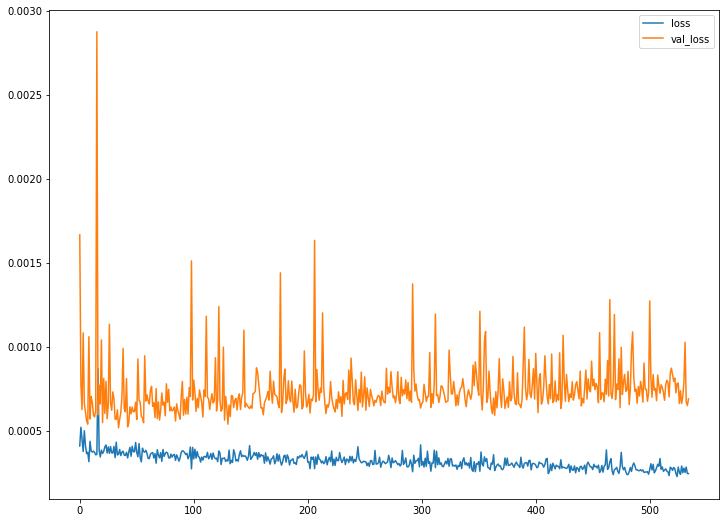

In [52]:
plt.figure(figsize=(12, 9))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [53]:
model.load_weights(filename)
pred = model.predict(test_feature)
print(pred)

[[[ 0.13163874  0.50056046  0.01792344]
  [ 0.07302418  0.4847712  -0.00275008]
  [ 0.10983969  0.5535948  -0.0313111 ]
  ...
  [ 0.11335409  0.5651477  -0.03089154]
  [ 0.05546348  0.53027976 -0.01403865]
  [ 0.08114744  0.5953203  -0.00520879]]

 [[ 0.09779146  0.37164658  0.00553306]
  [ 0.0795539   0.3743449  -0.00502269]
  [ 0.08039778  0.3838983   0.00642557]
  ...
  [ 0.09201598  0.39564264  0.00181153]
  [ 0.0801957   0.37785873  0.0021264 ]
  [ 0.07108173  0.3904512  -0.0164766 ]]

 [[ 0.11607787  0.30317837  0.00217469]
  [ 0.10978095  0.30678022 -0.00272932]
  [ 0.10588454  0.30583453  0.00916573]
  ...
  [ 0.11649488  0.31861094  0.00481458]
  [ 0.11181367  0.30506864  0.00373523]
  [ 0.10366634  0.3081792  -0.01135286]]

 ...

 [[ 0.9019266   0.93663484 -0.00598918]
  [ 0.90196586  0.9435734  -0.00651254]
  [ 0.89709395  0.933549    0.00308878]
  ...
  [ 0.9029163   0.92259914 -0.00422071]
  [ 0.91952956  0.94234     0.00230636]
  [ 0.9113692   0.9215528  -0.00709579]]

 [

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_3 (GRU)                  (None, 10, 64)            13248     
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_1 (Dense)              (None, 96)                3168      
_________________________________________________________________
reshape_1 (Reshape)          (None, 32, 3)             0         
Total params: 28,832
Trainable params: 28,832
Non-trainable params: 0
_________________________________________________________________


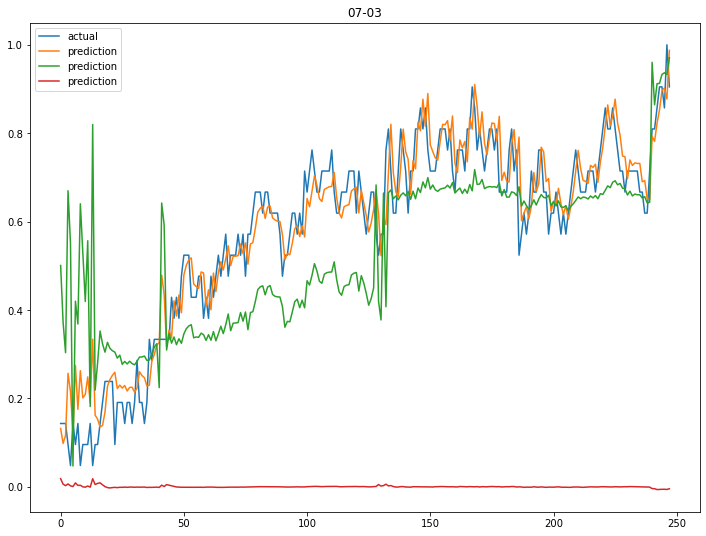

In [54]:
model.summary()

plt.figure(figsize=(12, 9))
plt.plot(test_label[:,0], label='actual')
plt.plot(pred[:,0], label='prediction')
plt.title('07-03')
plt.savefig('savefig/cell7/07-03.png')
plt.legend()
plt.show()

In [55]:
'''
loop = len(test_label)
error_avg = 0
for i in range(loop):
    error = abs((test_label[i] - pred[i])/test_label[i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)
'''

'\nloop = len(test_label)\nerror_avg = 0\nfor i in range(loop):\n    error = abs((test_label[i] - pred[i])/test_label[i] * 100)\n    error_avg = error_avg + error\n\nerror_avg = error_avg / loop\nprint(error_avg)\n'

In [56]:
test_ds2 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_23.csv',delimiter=",", skiprows=1)

test_ds2 = scaler.fit_transform(test_ds2)
x_test2 = test_ds2[:, 1:4]
y_test2 = test_ds2[:, 1:4]

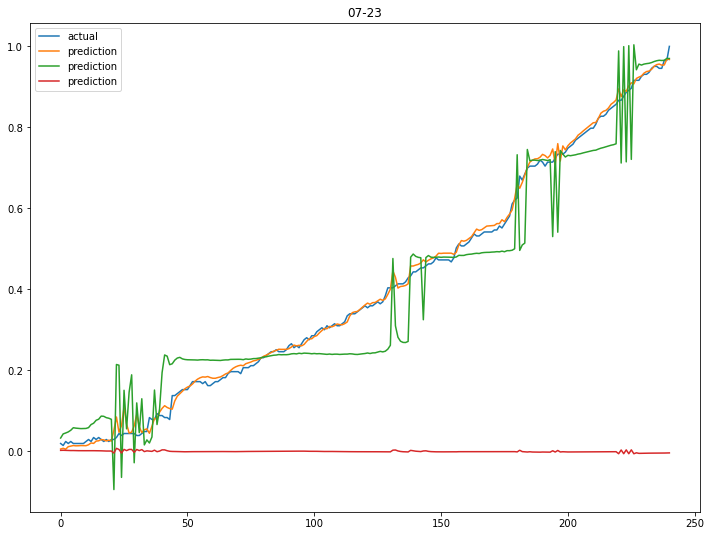

In [57]:
test_feature2, test_label2 = make_dataset(x_test2, y_test2, 10)

pred2 = model.predict(test_feature2)

plt.figure(figsize=(12, 9))
plt.plot(test_label2[:,0], label='actual')
plt.plot(pred2[:, 0], label='prediction')
plt.title('07-23')
plt.savefig('savefig/cell7/07-23.png')
plt.legend()
plt.show()

241


"\npred2 = model.predict(test_feature2)\n\nplt.figure(figsize=(12, 9))\nplt.plot(test_label2[:,0], label='actual')\nplt.plot(pred2[:, 0], label='prediction')\nplt.title('07-23')\nplt.savefig('savefig/cell7/07-23.png')\nplt.legend()\nplt.show()\nloop = len(test_label2)\nerror_avg = 0\nfor i in range(loop):\n    error = abs((test_label2[i] - pred2[i])/test_label2[i] * 100)\n    error_avg = error_avg + error\n\nerror_avg = error_avg / loop\nprint(error_avg)\n"

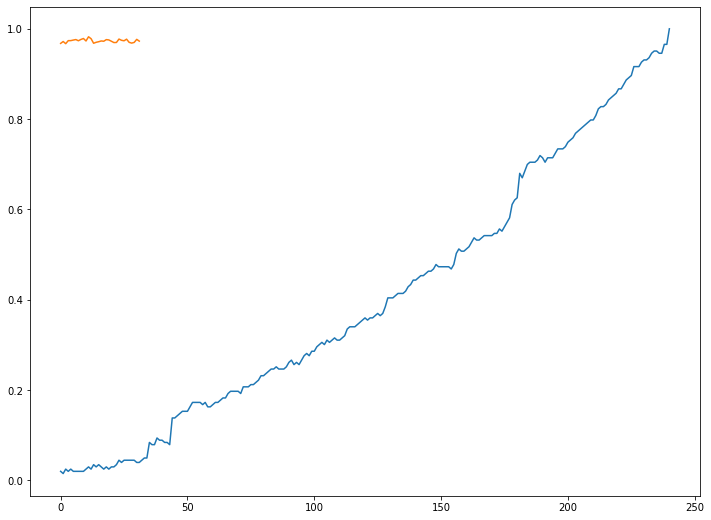

In [65]:
print(len(test_label2))
plt.figure(figsize=(12, 9))
plt.plot(test_label2[:, 0], label ='actual')

predictions = model(test_feature2)

plt.plot(predictions[240,:,0], label='predictions')


'''
pred2 = model.predict(test_feature2)

plt.figure(figsize=(12, 9))
plt.plot(test_label2[:,0], label='actual')
plt.plot(pred2[:, 0], label='prediction')
plt.title('07-23')
plt.savefig('savefig/cell7/07-23.png')
plt.legend()
plt.show()
loop = len(test_label2)
error_avg = 0
for i in range(loop):
    error = abs((test_label2[i] - pred2[i])/test_label2[i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)
'''

<ipython-input-59-bf321a546b94>:13: RuntimeWarning: divide by zero encountered in true_divide
  error = abs((test_label3[i] - pred3[i])/test_label3[i] * 100)


[[2.58299332e-03 8.61003561e-03            inf]
 [2.20768660e-03 6.11176190e-03            inf]
 [6.68960868e-05 1.00624214e-02            inf]
 [1.72014375e-03 9.27737616e-03            inf]
 [2.12551321e-03 1.27007660e-02            inf]
 [5.31696579e-04 1.18440795e-02            inf]
 [3.58547979e-03 1.07097973e-02            inf]
 [1.22739273e-03 1.24086454e-02            inf]
 [3.94443864e-03 7.86642426e-03            inf]
 [3.53096758e-03 1.14492132e-02            inf]
 [7.28970592e-04 1.17939074e-02            inf]
 [6.20953088e-03 1.14225357e-02            inf]
 [8.72716163e-04 8.37436579e-03            inf]
 [4.01202915e-04 1.42780322e-02            inf]
 [2.03356002e-03 8.01222417e-03            inf]
 [5.42963593e-03 1.09074475e-02            inf]
 [1.32982013e-04 7.41539650e-03            inf]
 [1.39717917e-03 3.95925300e-03            inf]
 [1.27021549e-03 9.77423585e-03            inf]
 [1.00089508e-03 7.21985854e-03            inf]
 [7.64675511e-04 1.26623124e-02         

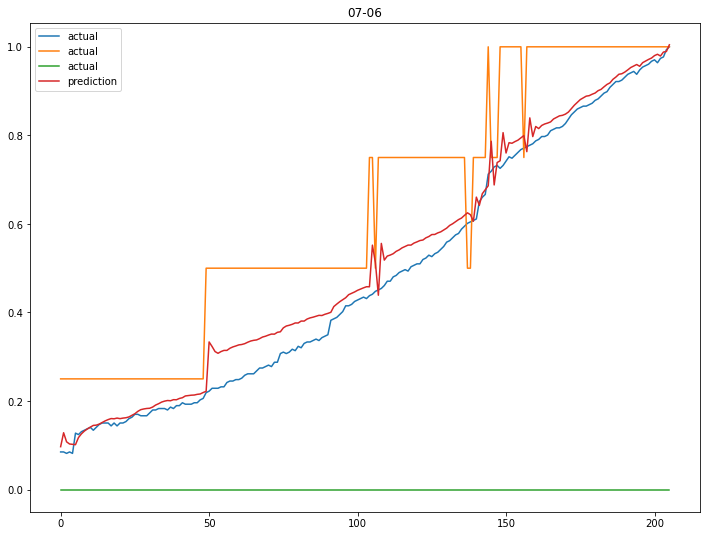

In [59]:
test_ds3 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_06.csv',delimiter=",", skiprows=1)

test_ds3 = scaler.fit_transform(test_ds3)
x_test3 = test_ds3[:, 1:4]
y_test3 = test_ds3[:, 1:4]
test_feature3, test_label3 = make_dataset(x_test3, y_test3, 50)

pred3 = model.predict(test_feature3)

loop = len(test_label3)
for i in range(loop):
    error_avg = 0
    error = abs((test_label3[i] - pred3[i])/test_label3[i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)

plt.figure(figsize=(12, 9))
plt.plot(test_label3, label='actual')
plt.plot(pred3[:,1,0], label='prediction')
plt.title('07-06')
plt.savefig('savefig/cell7/07-06.png')
plt.legend()
plt.show()


In [60]:
test_ds4 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_7.csv',delimiter=",", skiprows=1)
test_ds4 = scaler.fit_transform(test_ds4)
x_test4 = test_ds4[:, 1:2]
y_test4 = test_ds4[:, 1]
test_feature4, test_label4 = make_dataset(x_test4, y_test4, 10)

pred4 = model.predict(test_feature4)
loop = len(test_label4)
for i in range(loop):
    error_avg = 0
    error = abs((test_label4[i] - pred4[i])/test_label4[i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)

plt.figure(figsize=(12, 9))
plt.plot(test_label4, label='actual')
plt.plot(pred4, label='prediction')
plt.title('07-07')
plt.savefig('savefig/cell7/07-07.png')
plt.legend()
plt.show()

InvalidArgumentError:  Specified a list with shape [?,3] from a tensor with shape [32,1]
	 [[node sequential_3/gru_3/TensorArrayUnstack/TensorListFromTensor (defined at <ipython-input-50-6b122fb95410>:7) ]] [Op:__inference_predict_function_545657]

Function call stack:
predict_function


In [ ]:
test_ds5 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_9.csv',delimiter=",", skiprows=1)
test_ds5 = scaler.fit_transform(test_ds5)
x_test5 = test_ds5[:, 1:2]
y_test5 = test_ds5[:, 1]
test_feature5, test_label5 = make_dataset(x_test5, y_test5, 10)

pred5 = model.predict(test_feature5)

loop = len(test_label5)
for i in range(loop):
    error_avg = 0
    if test_label5[i]!=0:
        error = abs((test_label5[i] - pred5[i])/test_label5[i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)

plt.figure(figsize=(12, 9))
plt.plot(test_label5, label='actual')
plt.plot(pred5, label='prediction')
plt.title('07-09')
plt.savefig('savefig/cell7/07-09.png')
plt.legend()
plt.show()

In [ ]:
test_ds6 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_18.csv',delimiter=",", skiprows=1)
test_ds6 = scaler.fit_transform(test_ds6)
x_test6 = test_ds6[:, 1:2]
y_test6 = test_ds6[:, 1]
test_feature6, test_label6 = make_dataset(x_test6, y_test6, 10)

pred6 = model.predict(test_feature6)

loop = len(test_label6)
for i in range(loop):
    error_avg = 0
    error = abs((test_label6[i] - pred6[i])/test_label6[i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)

plt.figure(figsize=(12, 9))
plt.plot(test_label6, label='actual')
plt.plot(pred6, label='prediction')
plt.title('07-18')
plt.savefig('savefig/cell7/07-18.png')
plt.legend()
plt.show()

In [ ]:
test_ds7 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_19.csv',delimiter=",", skiprows=1)
test_ds7 = scaler.fit_transform(test_ds7)
x_test7 = test_ds7[:, 1:2]
y_test7 = test_ds7[:, 1]
test_feature7, test_label7 = make_dataset(x_test7, y_test7, 10)

pred7 = model.predict(test_feature7)

loop = len(test_label7)
for i in range(loop):
    error_avg = 0
    if test_label7[i]!=0:
        error = abs((test_label7[i] - pred7[i])/test_label7[i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)

plt.figure(figsize=(12, 9))
plt.plot(test_label7, label='actual')
plt.plot(pred7, label='prediction')
plt.title('07-19')
plt.savefig('savefig/cell7/07-19.png')
plt.legend()
plt.show()

In [ ]:
test_ds7 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_20.csv',delimiter=",", skiprows=1)
test_ds7 = scaler.fit_transform(test_ds7)
x_test7 = test_ds7[:, 1:2]
y_test7 = test_ds7[:, 1]
test_feature7, test_label7 = make_dataset(x_test7, y_test7, 10)

pred7 = model.predict(test_feature7)

loop = len(test_label7)
for i in range(loop):
    error_avg = 0
    if test_label7[i]!=0:
        error = abs((test_label7[i] - pred7[i])/test_label7[i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)

plt.figure(figsize=(12, 9))
plt.plot(test_label7, label='actual')
plt.plot(pred7, label='prediction')
plt.title('07-20')
plt.savefig('savefig/cell7/07-20.png')
plt.legend()
plt.show()

In [ ]:
test_ds8 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_22.csv',delimiter=",", skiprows=1)
test_ds8 = scaler.fit_transform(test_ds8)
print(test_ds8.shape)
x_test8 = test_ds8[:, 1:2]
y_test8 = test_ds8[:, 1]
test_feature8, test_label8 = make_dataset(x_test8, y_test8, 10)

pred8 = model.predict(test_feature8)

loop = len(test_label8)
for i in range(loop):
    error_avg = 0
    if test_label8[i]!=0:
        error = abs((test_label8[i] - pred8[i])/test_label8[i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)

plt.figure(figsize=(12, 9))
plt.plot(test_label8, label='actual')
plt.plot(pred8, label='prediction')
plt.title('07-22')
plt.savefig('savefig/cell7/07-22.png')
plt.legend()
plt.show()

In [25]:
print(pred8.shape)
print(test_feature8.shape)

(241, 1)
(241, 10, 1)


In [26]:
def predict_next_timestamp(model, history):
    """Predict the next time stamp given a sequence of history data"""

    prediction = model.predict(history)
    prediction = np.reshape(prediction, (prediction.size,))
    return prediction

In [27]:
xhat = test_feature8[0]
xxhat = np.array([xhat])
print(xxhat.shape)
tttest=model.predict(xxhat)

(1, 10, 1)


In [28]:
testpred = np.zeros((300,1))
testpred.shape


(300, 1)

In [29]:

for i in range(300):
    expred = model.predict(np.array([xhat]))
    testpred[i] = expred
    xhat = np.vstack([xhat[1:],expred])

print(testpred.shape)
'''
i=0
expred = model.predict(np.array([xhat]))
testpred[i] = expred
xhat = np.vstack([xhat[1:],expred])

testpred.shape'''
'''
xhat = test_feature8
test1 = np.zeros((20,10,1))
print(test1.shape, xhat.shape)
testfe = np.concatenate((xhat,test1), axis=0)
testfe.shape'''

(300, 1)


'\nxhat = test_feature8\ntest1 = np.zeros((20,10,1))\nprint(test1.shape, xhat.shape)\ntestfe = np.concatenate((xhat,test1), axis=0)\ntestfe.shape'

In [133]:
test_ds8 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_22.csv',delimiter=",", skiprows=1)
test_ds8 = scaler.fit_transform(test_ds8)
print(test_ds8.shape)
x_test8 = test_ds8[:, 1:4]
y_test8 = test_ds8[:, 1:4]
ac_y_test8 = y_test8
ac_y_test8 = ac_y_test8[29:]
test_feature8, test_label8 = make_dataset(x_test8, y_test8, 50)
ac_test_feature8, ac_test_label8 = make_dataset(x_test8, y_test8, 50)

for i in range(100):
    plz_pred = model.predict(test_feature8)
    pred_len = len(plz_pred)
    add_pred = plz_pred[200,1,1]
    print([add_pred])
    print(add_pred.shape)
    x_test8 = np.append(x_test8, add_pred)
    y_test8 = np.append(y_test8, add_pred)
    x_test8 = x_test8[1:]
    y_test8 = y_test8[1:]
    test_len = len(x_test8)
    x_test8 = x_test8.reshape((test_len,50,1))
    y_test8 = y_test8.reshape((test_len,50,1))
    print(x_test8.shape,y_test8.shape)
    test_feature8, test_label8 = make_dataset(x_test8, y_test8, 50)
    print(x_test8.shape,y_test8.shape)
  #  print(x_test8.shape)
#print(y_test8.shape)



(251, 4)
[0.20065019]
()


ValueError: cannot reshape array of size 753 into shape (753,50,1)

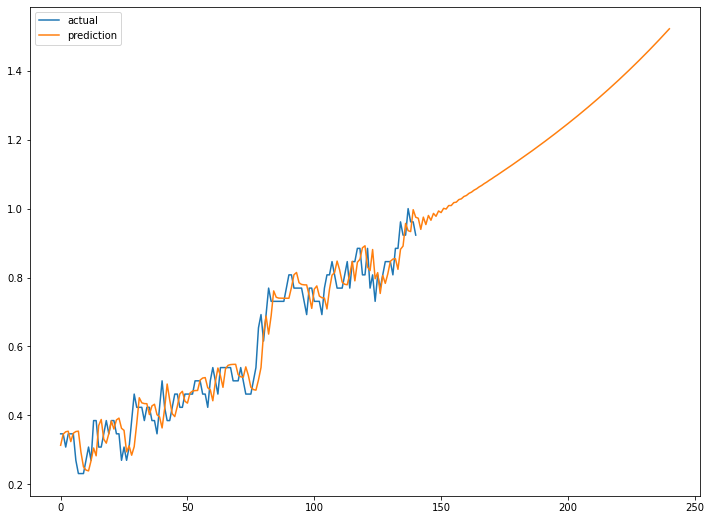

In [32]:
ac_test_label8 = ac_test_label8[100:]

plt.figure(figsize=(12, 9))
plt.plot(ac_test_label8, label='actual')
plt.plot(plz_pred, label='prediction')
plt.legend()
plt.show()

In [162]:
test_ds8 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_22.csv',delimiter=",", skiprows=1)
test_ds8 = scaler.fit_transform(test_ds8)
print(test_ds8.shape)
x_test8 = test_ds8[:, 1:4]
y_test8 = test_ds8[:, 1:4]
ac_y_test8 = y_test8
ac_y_test8 = ac_y_test8[29:]
ac_test_feature8, ac_test_label8 = make_dataset(x_test8, y_test8, 10)
x_test8 = test_ds8[:200, 1:4]
y_test8 = test_ds8[:200, 1:4]
test_feature8, test_label8 = make_dataset(x_test8, y_test8, 10)


for i in range(100):
    plz_pred = model.predict(test_feature8)
    pred_len = len(plz_pred)
    print('plz_pred')
    print(plz_pred)
    add_pred = plz_pred[pred_len-1,1,:]
    print([add_pred])
    print(add_pred.shape)
    x_test8 = np.append(x_test8, add_pred)
    y_test8 = np.append(y_test8, add_pred)
    test_len = len(x_test8)
    x_test8 = x_test8.reshape((test_len,1))
    y_test8 = y_test8.reshape((test_len,1))
    print(x_test8.shape,y_test8.shape)
    test_feature8, test_label8 = make_dataset(x_test8, y_test8, 10)
    print(x_test8.shape,y_test8.shape)
  #  print(x_test8.shape)
#print(y_test8.shape)



(251, 4)
plz_pred
[[[ 2.3909692e-01  9.6380782e-01 -9.6276752e-04]
  [ 2.3680788e-01  9.9282503e-01 -1.4331932e-02]
  [ 2.2186959e-01  9.6145439e-01  3.7272509e-02]
  ...
  [ 2.3350134e-01  9.7894752e-01  5.5908761e-03]
  [ 2.2885908e-01  9.6026802e-01  1.9791888e-03]
  [ 2.2713849e-01  9.6059132e-01 -5.9417561e-03]]

 [[ 2.4167712e-01  9.6070707e-01 -1.0747619e-03]
  [ 2.3945968e-01  9.8991847e-01 -1.4215712e-02]
  [ 2.2440669e-01  9.5897186e-01  3.6260646e-02]
  ...
  [ 2.3584631e-01  9.7597718e-01  5.7234275e-03]
  [ 2.3128232e-01  9.5727515e-01  1.8315412e-03]
  [ 2.2968483e-01  9.5780903e-01 -6.1467681e-03]]

 [[ 2.4875285e-01  9.5794159e-01 -1.3589379e-03]
  [ 2.4674404e-01  9.8653865e-01 -1.3495856e-02]
  [ 2.3216212e-01  9.5715559e-01  3.4181826e-02]
  ...
  [ 2.4273711e-01  9.7298163e-01  5.3446633e-03]
  [ 2.3830879e-01  9.5484960e-01  1.6769872e-03]
  [ 2.3720872e-01  9.5581609e-01 -7.3151737e-03]]

 ...

 [[ 7.1981078e-01  9.4920385e-01 -1.6823723e-03]
  [ 7.1853262e-01  9.

InvalidArgumentError:  Specified a list with shape [?,3] from a tensor with shape [32,1]
	 [[node sequential_9/gru_9/TensorArrayUnstack/TensorListFromTensor (defined at <ipython-input-160-1c66caeafe85>:15) ]] [Op:__inference_predict_function_1888180]

Function call stack:
predict_function


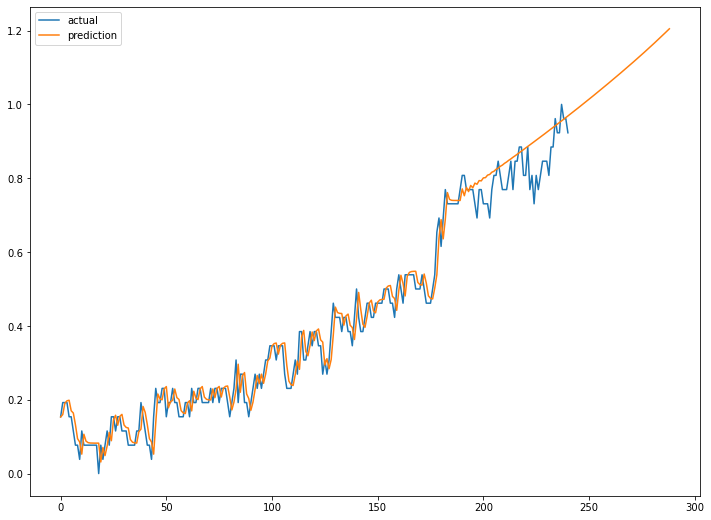

[0.12040385]


In [77]:
plt.figure(figsize=(12, 9))
plt.plot(ac_test_label8, label='actual')
plt.plot(plz_pred, label='prediction')
plt.savefig('savefig/cell7_copy4/22.png')
plt.legend()
plt.show()

loop = len(ac_test_label8) - 200
for i in range(loop):
    error_avg = 0
    error = abs((ac_test_label8[200+i] - plz_pred[200+i])/ac_test_label8[200+i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)

In [78]:
test_ds8 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_23.csv',delimiter=",", skiprows=1)
test_ds8 = scaler.fit_transform(test_ds8)
print(test_ds8.shape)
x_test8 = test_ds8[:, 1:2]
y_test8 = test_ds8[:, 1]
ac_y_test8 = y_test8
ac_y_test8 = ac_y_test8[29:]
ac_test_feature8, ac_test_label8 = make_dataset(x_test8, y_test8, 10)
x_test8 = test_ds8[:200, 1:2]
y_test8 = test_ds8[:200, 1]
test_feature8, test_label8 = make_dataset(x_test8, y_test8, 10)


for i in range(100):
    plz_pred = model.predict(test_feature8)
    pred_len = len(plz_pred)
    add_pred = plz_pred[pred_len-1].reshape((1,1))
    print([add_pred])
    print(add_pred.shape)
    x_test8 = np.append(x_test8, add_pred)
    y_test8 = np.append(y_test8, add_pred)
    test_len = len(x_test8)
    x_test8 = x_test8.reshape((test_len,1))
    y_test8 = y_test8.reshape((test_len,1))
    print(x_test8.shape,y_test8.shape)
    test_feature8, test_label8 = make_dataset(x_test8, y_test8, 10)
    print(x_test8.shape,y_test8.shape)
  #  print(x_test8.shape)
#print(y_test8.shape)



(251, 4)
[array([[0.7173299]], dtype=float32)]
(1, 1)
(201, 1) (201, 1)
(201, 1) (201, 1)
[array([[0.7260763]], dtype=float32)]
(1, 1)
(202, 1) (202, 1)
(202, 1) (202, 1)
[array([[0.72613037]], dtype=float32)]
(1, 1)
(203, 1) (203, 1)
(203, 1) (203, 1)
[array([[0.7333391]], dtype=float32)]
(1, 1)
(204, 1) (204, 1)
(204, 1) (204, 1)
[array([[0.7346736]], dtype=float32)]
(1, 1)
(205, 1) (205, 1)
(205, 1) (205, 1)
[array([[0.7408463]], dtype=float32)]
(1, 1)
(206, 1) (206, 1)
(206, 1) (206, 1)
[array([[0.7430441]], dtype=float32)]
(1, 1)
(207, 1) (207, 1)
(207, 1) (207, 1)
[array([[0.7485199]], dtype=float32)]
(1, 1)
(208, 1) (208, 1)
(208, 1) (208, 1)
[array([[0.7513031]], dtype=float32)]
(1, 1)
(209, 1) (209, 1)
(209, 1) (209, 1)
[array([[0.75631154]], dtype=float32)]
(1, 1)
(210, 1) (210, 1)
(210, 1) (210, 1)
[array([[0.7594937]], dtype=float32)]
(1, 1)
(211, 1) (211, 1)
(211, 1) (211, 1)
[array([[0.76418895]], dtype=float32)]
(1, 1)
(212, 1) (212, 1)
(212, 1) (212, 1)
[array([[0.76764

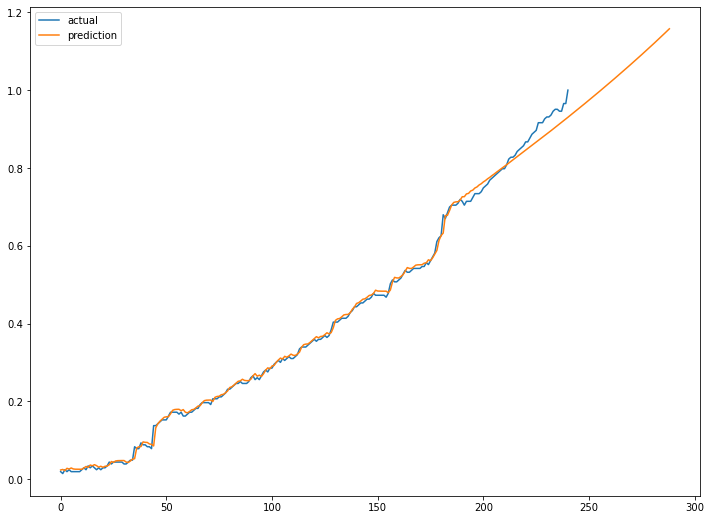

[0.17021793]


In [79]:
plt.figure(figsize=(12, 9))
plt.plot(ac_test_label8, label='actual')
plt.plot(plz_pred, label='prediction')
plt.savefig('savefig/cell7_copy4/23.png')
plt.legend()
plt.show()
loop = len(ac_test_label8) - 200
for i in range(loop):
    error_avg = 0
    error = abs((ac_test_label8[200+i] - plz_pred[200+i])/ac_test_label8[200+i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)

In [80]:
test_ds8 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_20.csv',delimiter=",", skiprows=1)
test_ds8 = scaler.fit_transform(test_ds8)
print(test_ds8.shape)
x_test8 = test_ds8[:, 1:2]
y_test8 = test_ds8[:, 1]
ac_y_test8 = y_test8
ac_y_test8 = ac_y_test8[29:]
ac_test_feature8, ac_test_label8 = make_dataset(x_test8, y_test8, 10)
x_test8 = test_ds8[:200, 1:2]
y_test8 = test_ds8[:200, 1]
test_feature8, test_label8 = make_dataset(x_test8, y_test8, 10)


for i in range(100):
    plz_pred = model.predict(test_feature8)
    pred_len = len(plz_pred)
    add_pred = plz_pred[pred_len-1].reshape((1,1))
    print([add_pred])
    print(add_pred.shape)
    x_test8 = np.append(x_test8, add_pred)
    y_test8 = np.append(y_test8, add_pred)
    test_len = len(x_test8)
    x_test8 = x_test8.reshape((test_len,1))
    y_test8 = y_test8.reshape((test_len,1))
    print(x_test8.shape,y_test8.shape)
    test_feature8, test_label8 = make_dataset(x_test8, y_test8, 10)
    print(x_test8.shape,y_test8.shape)
  #  print(x_test8.shape)
#print(y_test8.shape)



(252, 4)
[array([[0.80784416]], dtype=float32)]
(1, 1)
(201, 1) (201, 1)
(201, 1) (201, 1)
[array([[0.82239115]], dtype=float32)]
(1, 1)
(202, 1) (202, 1)
(202, 1) (202, 1)
[array([[0.81797165]], dtype=float32)]
(1, 1)
(203, 1) (203, 1)
(203, 1) (203, 1)
[array([[0.82919675]], dtype=float32)]
(1, 1)
(204, 1) (204, 1)
(204, 1) (204, 1)
[array([[0.82742506]], dtype=float32)]
(1, 1)
(205, 1) (205, 1)
(205, 1) (205, 1)
[array([[0.83643997]], dtype=float32)]
(1, 1)
(206, 1) (206, 1)
(206, 1) (206, 1)
[array([[0.8365078]], dtype=float32)]
(1, 1)
(207, 1) (207, 1)
(207, 1) (207, 1)
[array([[0.8440195]], dtype=float32)]
(1, 1)
(208, 1) (208, 1)
(208, 1) (208, 1)
[array([[0.8453598]], dtype=float32)]
(1, 1)
(209, 1) (209, 1)
(209, 1) (209, 1)
[array([[0.8518402]], dtype=float32)]
(1, 1)
(210, 1) (210, 1)
(210, 1) (210, 1)
[array([[0.8540657]], dtype=float32)]
(1, 1)
(211, 1) (211, 1)
(211, 1) (211, 1)
[array([[0.8598449]], dtype=float32)]
(1, 1)
(212, 1) (212, 1)
(212, 1) (212, 1)
[array([[0.86

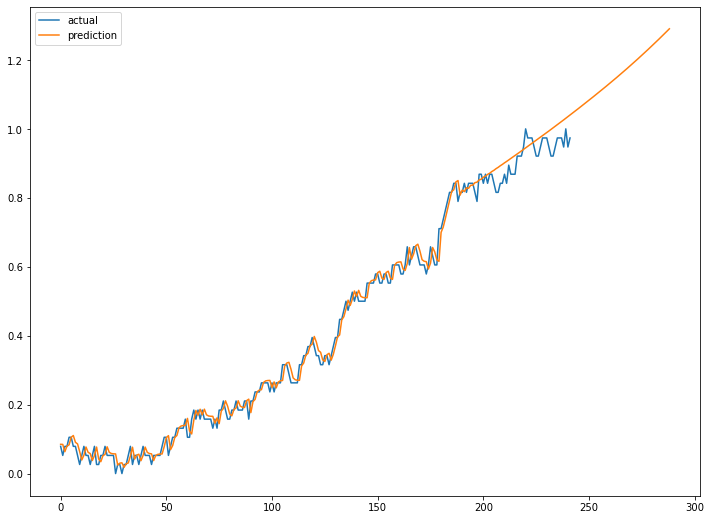

[0.16253729]


In [81]:
plt.figure(figsize=(12, 9))
plt.plot(ac_test_label8, label='actual')
plt.plot(plz_pred, label='prediction')
plt.savefig('savefig/cell7_copy4/20.png')
plt.legend()
plt.show()
loop = len(ac_test_label8) - 200
for i in range(loop):
    error_avg = 0
    error = abs((ac_test_label8[200+i] - plz_pred[200+i])/ac_test_label8[200+i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)

In [82]:
test_ds8 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_19.csv',delimiter=",", skiprows=1)
test_ds8 = scaler.fit_transform(test_ds8)
print(test_ds8.shape)
x_test8 = test_ds8[:, 1:2]
y_test8 = test_ds8[:, 1]
ac_y_test8 = y_test8
ac_y_test8 = ac_y_test8[29:]
ac_test_feature8, ac_test_label8 = make_dataset(x_test8, y_test8, 10)
x_test8 = test_ds8[:200, 1:2]
y_test8 = test_ds8[:200, 1]
test_feature8, test_label8 = make_dataset(x_test8, y_test8, 10)


for i in range(100):
    plz_pred = model.predict(test_feature8)
    pred_len = len(plz_pred)
    add_pred = plz_pred[pred_len-1].reshape((1,1))
    print([add_pred])
    print(add_pred.shape)
    x_test8 = np.append(x_test8, add_pred)
    y_test8 = np.append(y_test8, add_pred)
    test_len = len(x_test8)
    x_test8 = x_test8.reshape((test_len,1))
    y_test8 = y_test8.reshape((test_len,1))
    print(x_test8.shape,y_test8.shape)
    test_feature8, test_label8 = make_dataset(x_test8, y_test8, 10)
    print(x_test8.shape,y_test8.shape)
  #  print(x_test8.shape)
#print(y_test8.shape)



(252, 4)
[array([[0.6973296]], dtype=float32)]
(1, 1)
(201, 1) (201, 1)
(201, 1) (201, 1)
[array([[0.7060585]], dtype=float32)]
(1, 1)
(202, 1) (202, 1)
(202, 1) (202, 1)
[array([[0.7059218]], dtype=float32)]
(1, 1)
(203, 1) (203, 1)
(203, 1) (203, 1)
[array([[0.71319073]], dtype=float32)]
(1, 1)
(204, 1) (204, 1)
(204, 1) (204, 1)
[array([[0.7144266]], dtype=float32)]
(1, 1)
(205, 1) (205, 1)
(205, 1) (205, 1)
[array([[0.72063935]], dtype=float32)]
(1, 1)
(206, 1) (206, 1)
(206, 1) (206, 1)
[array([[0.72277355]], dtype=float32)]
(1, 1)
(207, 1) (207, 1)
(207, 1) (207, 1)
[array([[0.72826654]], dtype=float32)]
(1, 1)
(208, 1) (208, 1)
(208, 1) (208, 1)
[array([[0.7310076]], dtype=float32)]
(1, 1)
(209, 1) (209, 1)
(209, 1) (209, 1)
[array([[0.7360181]], dtype=float32)]
(1, 1)
(210, 1) (210, 1)
(210, 1) (210, 1)
[array([[0.73916644]], dtype=float32)]
(1, 1)
(211, 1) (211, 1)
(211, 1) (211, 1)
[array([[0.74385256]], dtype=float32)]
(1, 1)
(212, 1) (212, 1)
(212, 1) (212, 1)
[array([[0.74

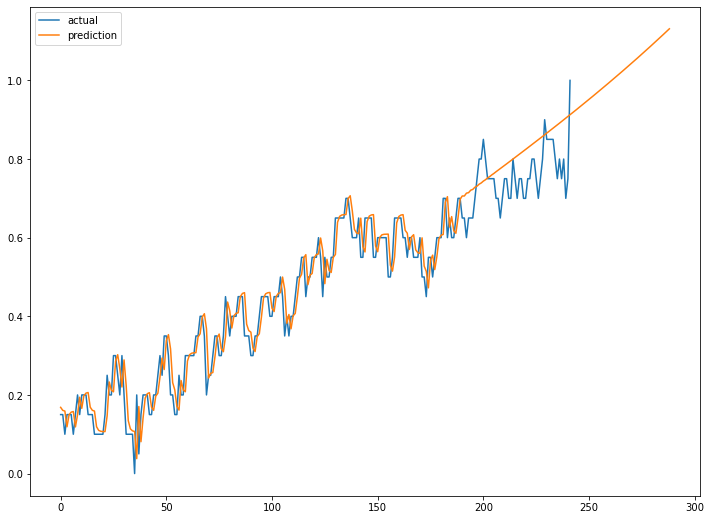

[0.20819776]


In [83]:
plt.figure(figsize=(12, 9))
plt.plot(ac_test_label8, label='actual')
plt.plot(plz_pred, label='prediction')
plt.savefig('savefig/cell7_copy4/19.png')
plt.legend()
plt.show()
loop = len(ac_test_label8) - 200
for i in range(loop):
    error_avg = 0
    error = abs((ac_test_label8[200+i] - plz_pred[200+i])/ac_test_label8[200+i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)

In [84]:
test_ds8 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_18.csv',delimiter=",", skiprows=1)
test_ds8 = scaler.fit_transform(test_ds8)
print(test_ds8.shape)
x_test8 = test_ds8[:, 1:2]
y_test8 = test_ds8[:, 1]
ac_y_test8 = y_test8
ac_y_test8 = ac_y_test8[29:]
ac_test_feature8, ac_test_label8 = make_dataset(x_test8, y_test8, 10)
x_test8 = test_ds8[:200, 1:2]
y_test8 = test_ds8[:200, 1]
test_feature8, test_label8 = make_dataset(x_test8, y_test8, 10)


for i in range(100):
    plz_pred = model.predict(test_feature8)
    pred_len = len(plz_pred)
    add_pred = plz_pred[pred_len-1].reshape((1,1))
    print([add_pred])
    print(add_pred.shape)
    x_test8 = np.append(x_test8, add_pred)
    y_test8 = np.append(y_test8, add_pred)
    test_len = len(x_test8)
    x_test8 = x_test8.reshape((test_len,1))
    y_test8 = y_test8.reshape((test_len,1))
    print(x_test8.shape,y_test8.shape)
    test_feature8, test_label8 = make_dataset(x_test8, y_test8, 10)
    print(x_test8.shape,y_test8.shape)
  #  print(x_test8.shape)
#print(y_test8.shape)



(252, 4)
[array([[0.83107466]], dtype=float32)]
(1, 1)
(201, 1) (201, 1)
(201, 1) (201, 1)
[array([[0.8454612]], dtype=float32)]
(1, 1)
(202, 1) (202, 1)
(202, 1) (202, 1)
[array([[0.84109205]], dtype=float32)]
(1, 1)
(203, 1) (203, 1)
(203, 1) (203, 1)
[array([[0.8523199]], dtype=float32)]
(1, 1)
(204, 1) (204, 1)
(204, 1) (204, 1)
[array([[0.8505958]], dtype=float32)]
(1, 1)
(205, 1) (205, 1)
(205, 1) (205, 1)
[array([[0.85965616]], dtype=float32)]
(1, 1)
(206, 1) (206, 1)
(206, 1) (206, 1)
[array([[0.85976034]], dtype=float32)]
(1, 1)
(207, 1) (207, 1)
(207, 1) (207, 1)
[array([[0.86733365]], dtype=float32)]
(1, 1)
(208, 1) (208, 1)
(208, 1) (208, 1)
[array([[0.8687049]], dtype=float32)]
(1, 1)
(209, 1) (209, 1)
(209, 1) (209, 1)
[array([[0.8752589]], dtype=float32)]
(1, 1)
(210, 1) (210, 1)
(210, 1) (210, 1)
[array([[0.8775137]], dtype=float32)]
(1, 1)
(211, 1) (211, 1)
(211, 1) (211, 1)
[array([[0.8833685]], dtype=float32)]
(1, 1)
(212, 1) (212, 1)
(212, 1) (212, 1)
[array([[0.886

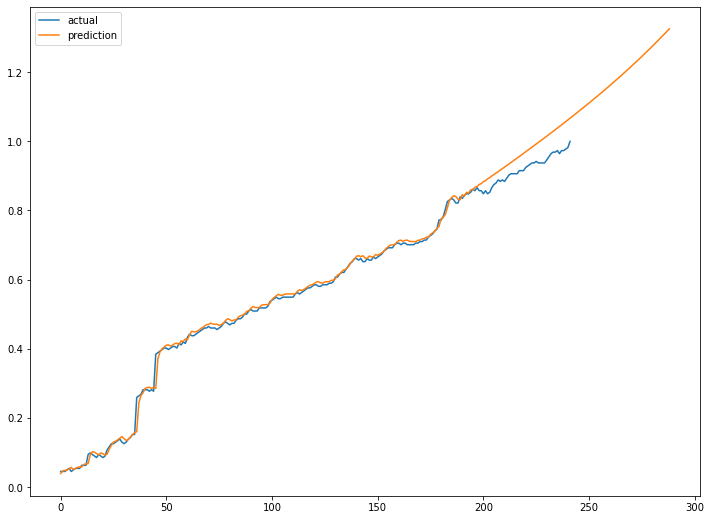

[0.15910324]


In [85]:
plt.figure(figsize=(12, 9))
plt.plot(ac_test_label8, label='actual')
plt.plot(plz_pred, label='prediction')
plt.savefig('savefig/cell7_copy4/18.png')
plt.legend()
plt.show()
loop = len(ac_test_label8) - 200
for i in range(loop):
    error_avg = 0
    error = abs((ac_test_label8[200+i] - plz_pred[200+i])/ac_test_label8[200+i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)

In [86]:
test_ds8 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_9.csv',delimiter=",", skiprows=1)
test_ds8 = scaler.fit_transform(test_ds8)
print(test_ds8.shape)
x_test8 = test_ds8[:, 1:2]
y_test8 = test_ds8[:, 1]
ac_y_test8 = y_test8
ac_y_test8 = ac_y_test8[29:]
ac_test_feature8, ac_test_label8 = make_dataset(x_test8, y_test8, 10)
x_test8 = test_ds8[:200, 1:2]
y_test8 = test_ds8[:200, 1]
test_feature8, test_label8 = make_dataset(x_test8, y_test8, 10)


for i in range(100):
    plz_pred = model.predict(test_feature8)
    pred_len = len(plz_pred)
    add_pred = plz_pred[pred_len-1].reshape((1,1))
    print([add_pred])
    print(add_pred.shape)
    x_test8 = np.append(x_test8, add_pred)
    y_test8 = np.append(y_test8, add_pred)
    test_len = len(x_test8)
    x_test8 = x_test8.reshape((test_len,1))
    y_test8 = y_test8.reshape((test_len,1))
    print(x_test8.shape,y_test8.shape)
    test_feature8, test_label8 = make_dataset(x_test8, y_test8, 10)
    print(x_test8.shape,y_test8.shape)
  #  print(x_test8.shape)
#print(y_test8.shape)



(254, 4)
[array([[0.876093]], dtype=float32)]
(1, 1)
(201, 1) (201, 1)
(201, 1) (201, 1)
[array([[0.8480299]], dtype=float32)]
(1, 1)
(202, 1) (202, 1)
(202, 1) (202, 1)
[array([[0.8790072]], dtype=float32)]
(1, 1)
(203, 1) (203, 1)
(203, 1) (203, 1)
[array([[0.8608785]], dtype=float32)]
(1, 1)
(204, 1) (204, 1)
(204, 1) (204, 1)
[array([[0.88367456]], dtype=float32)]
(1, 1)
(205, 1) (205, 1)
(205, 1) (205, 1)
[array([[0.87239367]], dtype=float32)]
(1, 1)
(206, 1) (206, 1)
(206, 1) (206, 1)
[array([[0.8895412]], dtype=float32)]
(1, 1)
(207, 1) (207, 1)
(207, 1) (207, 1)
[array([[0.88300353]], dtype=float32)]
(1, 1)
(208, 1) (208, 1)
(208, 1) (208, 1)
[array([[0.8962397]], dtype=float32)]
(1, 1)
(209, 1) (209, 1)
(209, 1) (209, 1)
[array([[0.8929966]], dtype=float32)]
(1, 1)
(210, 1) (210, 1)
(210, 1) (210, 1)
[array([[0.90352464]], dtype=float32)]
(1, 1)
(211, 1) (211, 1)
(211, 1) (211, 1)
[array([[0.90257615]], dtype=float32)]
(1, 1)
(212, 1) (212, 1)
(212, 1) (212, 1)
[array([[0.9112

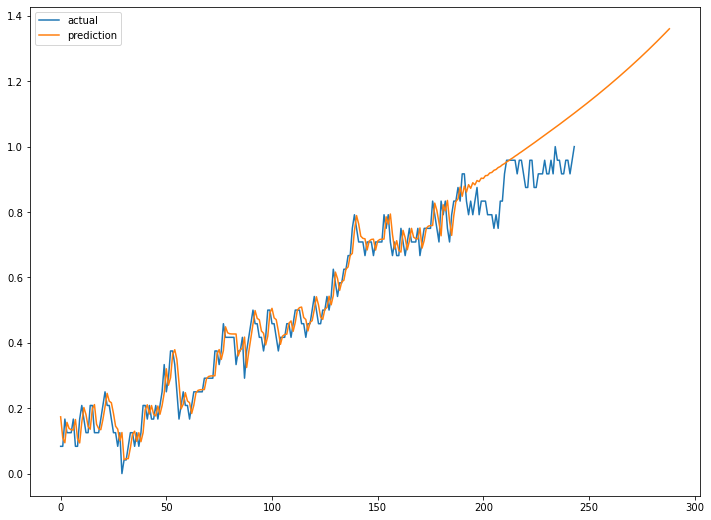

[0.23235136]


In [87]:
plt.figure(figsize=(12, 9))
plt.plot(ac_test_label8, label='actual')
plt.plot(plz_pred, label='prediction')
plt.savefig('savefig/cell7_copy4/09.png')
plt.legend()
plt.show()
loop = len(ac_test_label8) - 200
for i in range(loop):
    error_avg = 0
    error = abs((ac_test_label8[200+i] - plz_pred[200+i])/ac_test_label8[200+i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)

In [88]:
test_ds8 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_7.csv',delimiter=",", skiprows=1)
test_ds8 = scaler.fit_transform(test_ds8)
print(test_ds8.shape)
x_test8 = test_ds8[:, 1:2]
y_test8 = test_ds8[:, 1]
ac_y_test8 = y_test8
ac_y_test8 = ac_y_test8[29:]
ac_test_feature8, ac_test_label8 = make_dataset(x_test8, y_test8, 10)
x_test8 = test_ds8[:200, 1:2]
y_test8 = test_ds8[:200, 1]
test_feature8, test_label8 = make_dataset(x_test8, y_test8, 10)


for i in range(100):
    plz_pred = model.predict(test_feature8)
    pred_len = len(plz_pred)
    add_pred = plz_pred[pred_len-1].reshape((1,1))
    print([add_pred])
    print(add_pred.shape)
    x_test8 = np.append(x_test8, add_pred)
    y_test8 = np.append(y_test8, add_pred)
    test_len = len(x_test8)
    x_test8 = x_test8.reshape((test_len,1))
    y_test8 = y_test8.reshape((test_len,1))
    print(x_test8.shape,y_test8.shape)
    test_feature8, test_label8 = make_dataset(x_test8, y_test8, 10)
    print(x_test8.shape,y_test8.shape)
  #  print(x_test8.shape)
#print(y_test8.shape)



(255, 4)
[array([[0.6014979]], dtype=float32)]
(1, 1)
(201, 1) (201, 1)
(201, 1) (201, 1)
[array([[0.603802]], dtype=float32)]
(1, 1)
(202, 1) (202, 1)
(202, 1) (202, 1)
[array([[0.6091992]], dtype=float32)]
(1, 1)
(203, 1) (203, 1)
(203, 1) (203, 1)
[array([[0.612066]], dtype=float32)]
(1, 1)
(204, 1) (204, 1)
(204, 1) (204, 1)
[array([[0.6169772]], dtype=float32)]
(1, 1)
(205, 1) (205, 1)
(205, 1) (205, 1)
[array([[0.6202192]], dtype=float32)]
(1, 1)
(206, 1) (206, 1)
(206, 1) (206, 1)
[array([[0.62481105]], dtype=float32)]
(1, 1)
(207, 1) (207, 1)
(207, 1) (207, 1)
[array([[0.6282994]], dtype=float32)]
(1, 1)
(208, 1) (208, 1)
(208, 1) (208, 1)
[array([[0.6326801]], dtype=float32)]
(1, 1)
(209, 1) (209, 1)
(209, 1) (209, 1)
[array([[0.6363298]], dtype=float32)]
(1, 1)
(210, 1) (210, 1)
(210, 1) (210, 1)
[array([[0.64057034]], dtype=float32)]
(1, 1)
(211, 1) (211, 1)
(211, 1) (211, 1)
[array([[0.64432573]], dtype=float32)]
(1, 1)
(212, 1) (212, 1)
(212, 1) (212, 1)
[array([[0.6484729

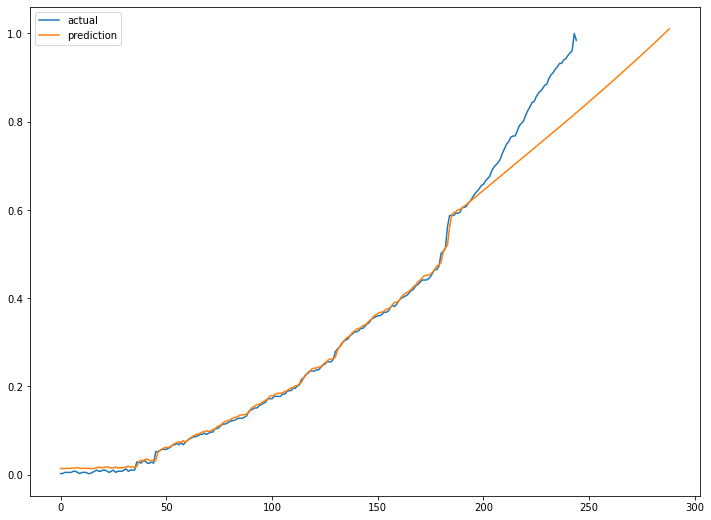

[0.36985365]


In [89]:
plt.figure(figsize=(12, 9))
plt.plot(ac_test_label8, label='actual')
plt.plot(plz_pred, label='prediction')
plt.savefig('savefig/cell7_copy4/07.png')
plt.legend()
plt.show()
loop = len(ac_test_label8) - 200
for i in range(loop):
    error_avg = 0
    error = abs((ac_test_label8[200+i] - plz_pred[200+i])/ac_test_label8[200+i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)

In [90]:
test_ds8 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_06.csv',delimiter=",", skiprows=1)
test_ds8 = scaler.fit_transform(test_ds8)
print(test_ds8.shape)
x_test8 = test_ds8[:, 1:2]
y_test8 = test_ds8[:, 1]
ac_y_test8 = y_test8
ac_y_test8 = ac_y_test8[29:]
ac_test_feature8, ac_test_label8 = make_dataset(x_test8, y_test8, 10)
x_test8 = test_ds8[:200, 1:2]
y_test8 = test_ds8[:200, 1]
test_feature8, test_label8 = make_dataset(x_test8, y_test8, 10)


for i in range(100):
    plz_pred = model.predict(test_feature8)
    pred_len = len(plz_pred)
    add_pred = plz_pred[pred_len-1].reshape((1,1))
    print([add_pred])
    print(add_pred.shape)
    x_test8 = np.append(x_test8, add_pred)
    y_test8 = np.append(y_test8, add_pred)
    test_len = len(x_test8)
    x_test8 = x_test8.reshape((test_len,1))
    y_test8 = y_test8.reshape((test_len,1))
    print(x_test8.shape,y_test8.shape)
    test_feature8, test_label8 = make_dataset(x_test8, y_test8, 10)
    print(x_test8.shape,y_test8.shape)
  #  print(x_test8.shape)
#print(y_test8.shape)


(256, 4)
[array([[0.7352941]], dtype=float32)]
(1, 1)
(201, 1) (201, 1)
(201, 1) (201, 1)
[array([[0.739949]], dtype=float32)]
(1, 1)
(202, 1) (202, 1)
(202, 1) (202, 1)
[array([[0.74341595]], dtype=float32)]
(1, 1)
(203, 1) (203, 1)
(203, 1) (203, 1)
[array([[0.7478531]], dtype=float32)]
(1, 1)
(204, 1) (204, 1)
(204, 1) (204, 1)
[array([[0.7514937]], dtype=float32)]
(1, 1)
(205, 1) (205, 1)
(205, 1) (205, 1)
[array([[0.7557977]], dtype=float32)]
(1, 1)
(206, 1) (206, 1)
(206, 1) (206, 1)
[array([[0.75956094]], dtype=float32)]
(1, 1)
(207, 1) (207, 1)
(207, 1) (207, 1)
[array([[0.76377743]], dtype=float32)]
(1, 1)
(208, 1) (208, 1)
(208, 1) (208, 1)
[array([[0.7676279]], dtype=float32)]
(1, 1)
(209, 1) (209, 1)
(209, 1) (209, 1)
[array([[0.7717883]], dtype=float32)]
(1, 1)
(210, 1) (210, 1)
(210, 1) (210, 1)
[array([[0.77570194]], dtype=float32)]
(1, 1)
(211, 1) (211, 1)
(211, 1) (211, 1)
[array([[0.7798285]], dtype=float32)]
(1, 1)
(212, 1) (212, 1)
(212, 1) (212, 1)
[array([[0.78378

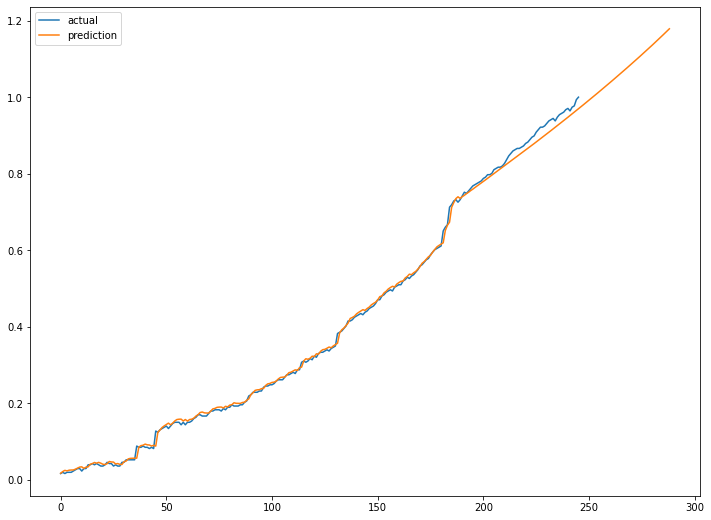

[0.06588814]


In [91]:
plt.figure(figsize=(12, 9))
plt.plot(ac_test_label8, label='actual')
plt.plot(plz_pred, label='prediction')
plt.savefig('savefig/cell7_copy4/06.png')
plt.legend()
plt.show()
loop = len(ac_test_label8) - 200
for i in range(loop):
    error_avg = 0
    error = abs((ac_test_label8[200+i] - plz_pred[200+i])/ac_test_label8[200+i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)

In [92]:
test_ds8 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_03.csv',delimiter=",", skiprows=1)
test_ds8 = scaler.fit_transform(test_ds8)
print(test_ds8.shape)
x_test8 = test_ds8[:, 1:2]
y_test8 = test_ds8[:, 1]
ac_y_test8 = y_test8
ac_y_test8 = ac_y_test8[29:]
ac_test_feature8, ac_test_label8 = make_dataset(x_test8, y_test8, 10)
x_test8 = test_ds8[:200, 1:2]
y_test8 = test_ds8[:200, 1]
test_feature8, test_label8 = make_dataset(x_test8, y_test8, 10)


for i in range(100):
    plz_pred = model.predict(test_feature8)
    pred_len = len(plz_pred)
    add_pred = plz_pred[pred_len-1].reshape((1,1))
    print([add_pred])
    print(add_pred.shape)
    x_test8 = np.append(x_test8, add_pred)
    y_test8 = np.append(y_test8, add_pred)
    test_len = len(x_test8)
    x_test8 = x_test8.reshape((test_len,1))
    y_test8 = y_test8.reshape((test_len,1))
    print(x_test8.shape,y_test8.shape)
    test_feature8, test_label8 = make_dataset(x_test8, y_test8, 10)
    print(x_test8.shape,y_test8.shape)
  #  print(x_test8.shape)
#print(y_test8.shape)


(258, 3)
[array([[0.67562455]], dtype=float32)]
(1, 1)
(201, 1) (201, 1)
(201, 1) (201, 1)
[array([[0.67562455]], dtype=float32)]
(1, 1)
(202, 1) (202, 1)
(202, 1) (202, 1)
[array([[0.68286794]], dtype=float32)]
(1, 1)
(203, 1) (203, 1)
(203, 1) (203, 1)
[array([[0.68416363]], dtype=float32)]
(1, 1)
(204, 1) (204, 1)
(204, 1) (204, 1)
[array([[0.6903194]], dtype=float32)]
(1, 1)
(205, 1) (205, 1)
(205, 1) (205, 1)
[array([[0.6924944]], dtype=float32)]
(1, 1)
(206, 1) (206, 1)
(206, 1) (206, 1)
[array([[0.6979299]], dtype=float32)]
(1, 1)
(207, 1) (207, 1)
(207, 1) (207, 1)
[array([[0.70069534]], dtype=float32)]
(1, 1)
(208, 1) (208, 1)
(208, 1) (208, 1)
[array([[0.70565134]], dtype=float32)]
(1, 1)
(209, 1) (209, 1)
(209, 1) (209, 1)
[array([[0.70881367]], dtype=float32)]
(1, 1)
(210, 1) (210, 1)
(210, 1) (210, 1)
[array([[0.7134504]], dtype=float32)]
(1, 1)
(211, 1) (211, 1)
(211, 1) (211, 1)
[array([[0.7168809]], dtype=float32)]
(1, 1)
(212, 1) (212, 1)
(212, 1) (212, 1)
[array([[0.7

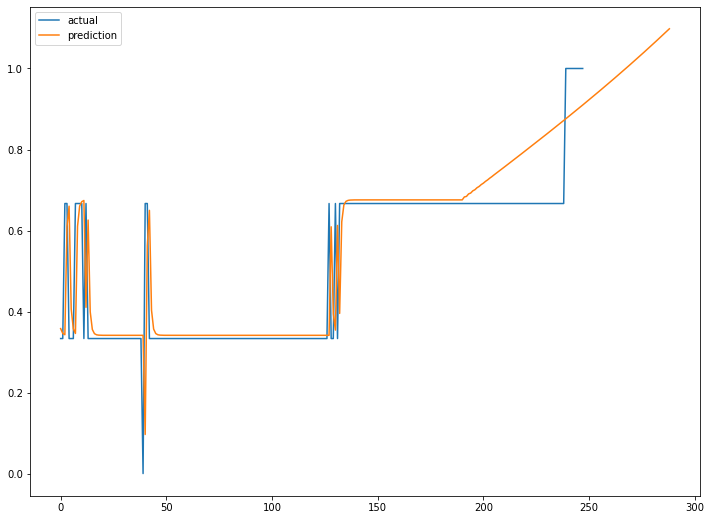

[0.18780108]


In [93]:
plt.figure(figsize=(12, 9))
plt.plot(ac_test_label8, label='actual')
plt.plot(plz_pred, label='prediction')
plt.legend()
plt.show()
loop = len(ac_test_label8) - 200
for i in range(loop):
    error_avg = 0
    error = abs((ac_test_label8[200+i] - plz_pred[200+i])/ac_test_label8[200+i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)